## This is tutorial for Kaggle Titanic Dataset

In [36]:
# Let us start by importing the libraries
import numpy as np
import pandas as pd

In [37]:
#time toimport the dataset
dataset = pd.read_csv('train.csv')

** Let us look for this dataset ans its features**

In [38]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see from the above that we have total 891 columns. 
Observe that we have 714 age colums, that is 177 NAN rows.
For cabin we have only 204 rows with data.
For Embarked we have 889 non zero values

### Its the time to explore the data. EDA

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

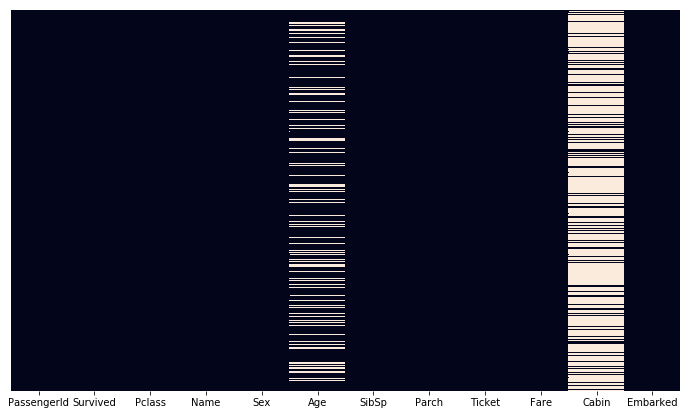

In [42]:
# Let us see the distribution of empty dataset
plt.figure(figsize=(12,7))
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False)

This plot shows the visulaisation of empty data. We have to impute the Age section here

In [45]:
# imputing the values in Age column
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

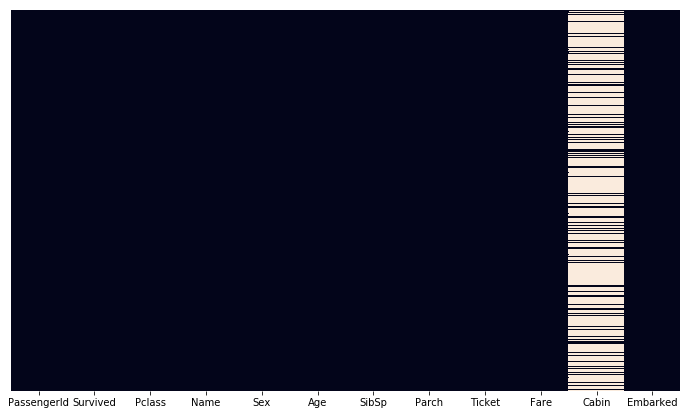

In [46]:
# Again plotting Null 
plt.figure(figsize=(12,7))
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False)

Now let us look up for the survival factors and see how the survival varies with other data points

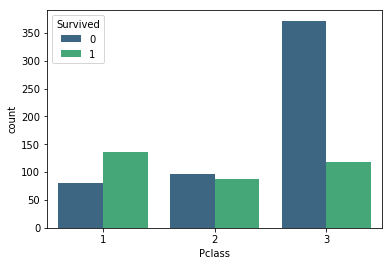

In [47]:
# First let us look for PClass
sns.countplot(x='Pclass', data=dataset,hue='Survived', palette='viridis')

It seems the PClass3 the poorest are die first. The survival rate of rich people is +ve, where as survival for PClass3 people is -ve. Money matters people. 

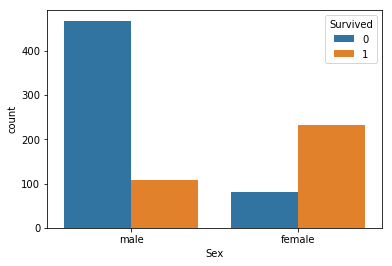

In [48]:
# Let us see for gender
sns.countplot(x='Sex',data=dataset, hue='Survived')

This visualisation is suporting the Titanic movie. Females and children first. 
Let us plot the age distribution as well

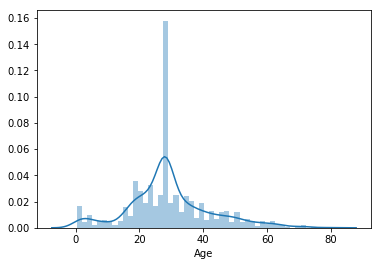

In [49]:
sns.distplot(dataset['Age'], bins=50)

In [50]:
# We can see that particular age to be very high, let us see that 
dataset['Age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
30.00     25
21.00     24
25.00     23
36.00     22
29.00     20
32.00     18
27.00     18
35.00     18
26.00     18
16.00     17
31.00     17
34.00     15
20.00     15
23.00     15
33.00     15
39.00     14
17.00     13
42.00     13
40.00     13
45.00     12
38.00     11
50.00     10
2.00      10
4.00      10
47.00      9
        ... 
71.00      2
59.00      2
63.00      2
0.83       2
30.50      2
70.00      2
57.00      2
0.75       2
13.00      2
10.00      2
64.00      2
40.50      2
32.50      2
45.50      2
20.50      1
24.50      1
0.67       1
14.50      1
0.92       1
74.00      1
34.50      1
80.00      1
12.00      1
36.50      1
53.00      1
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

This shows that we have a lot of young people in the younger age group

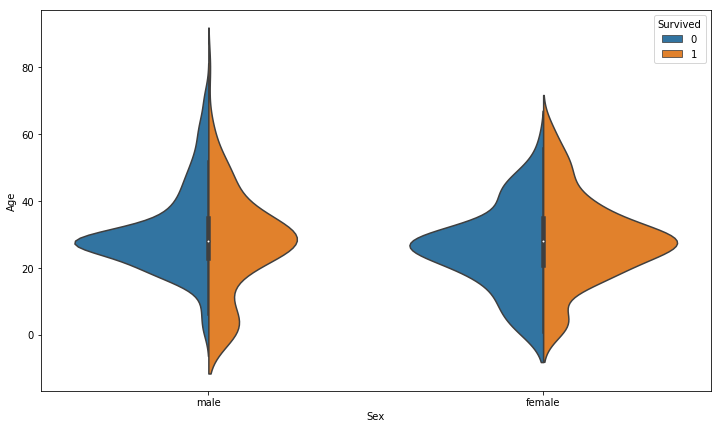

In [54]:
# Let us plot this age and survival to see their distribution
plt.figure(figsize=(12,7))
sns.violinplot(x='Sex', y='Age',data=dataset, hue='Survived',split=True)

In [56]:
# here we can see young males survive more than old, clearly females survival rate is higher 
# a large number of passengers are within 20-40 age

Time to see the impact of fair ticket on survival

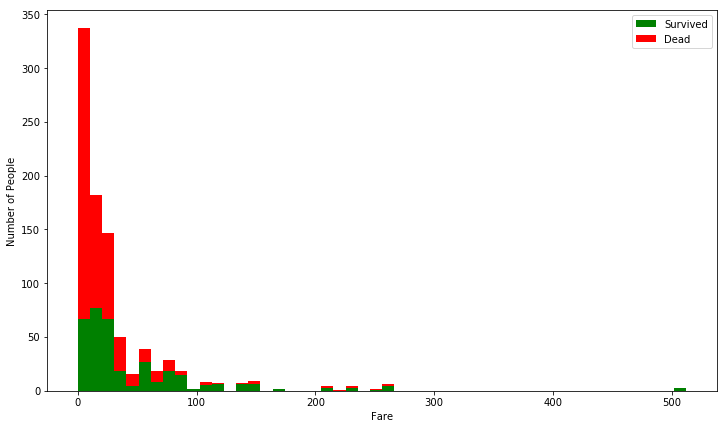

In [75]:
plt.figure(figsize=(12,7))
plt.hist([dataset[dataset['Survived'] == 1]['Fare'], dataset[dataset['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of People')
plt.legend()

Now let us see the relation of embarked

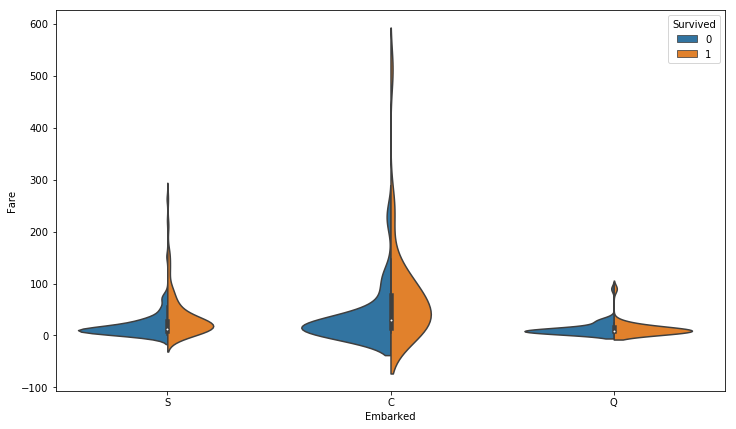

In [78]:
plt.figure(figsize=(12,7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=dataset,split=True)

In [79]:
# its time to see the pairplot and let us see if wew can find some other insights

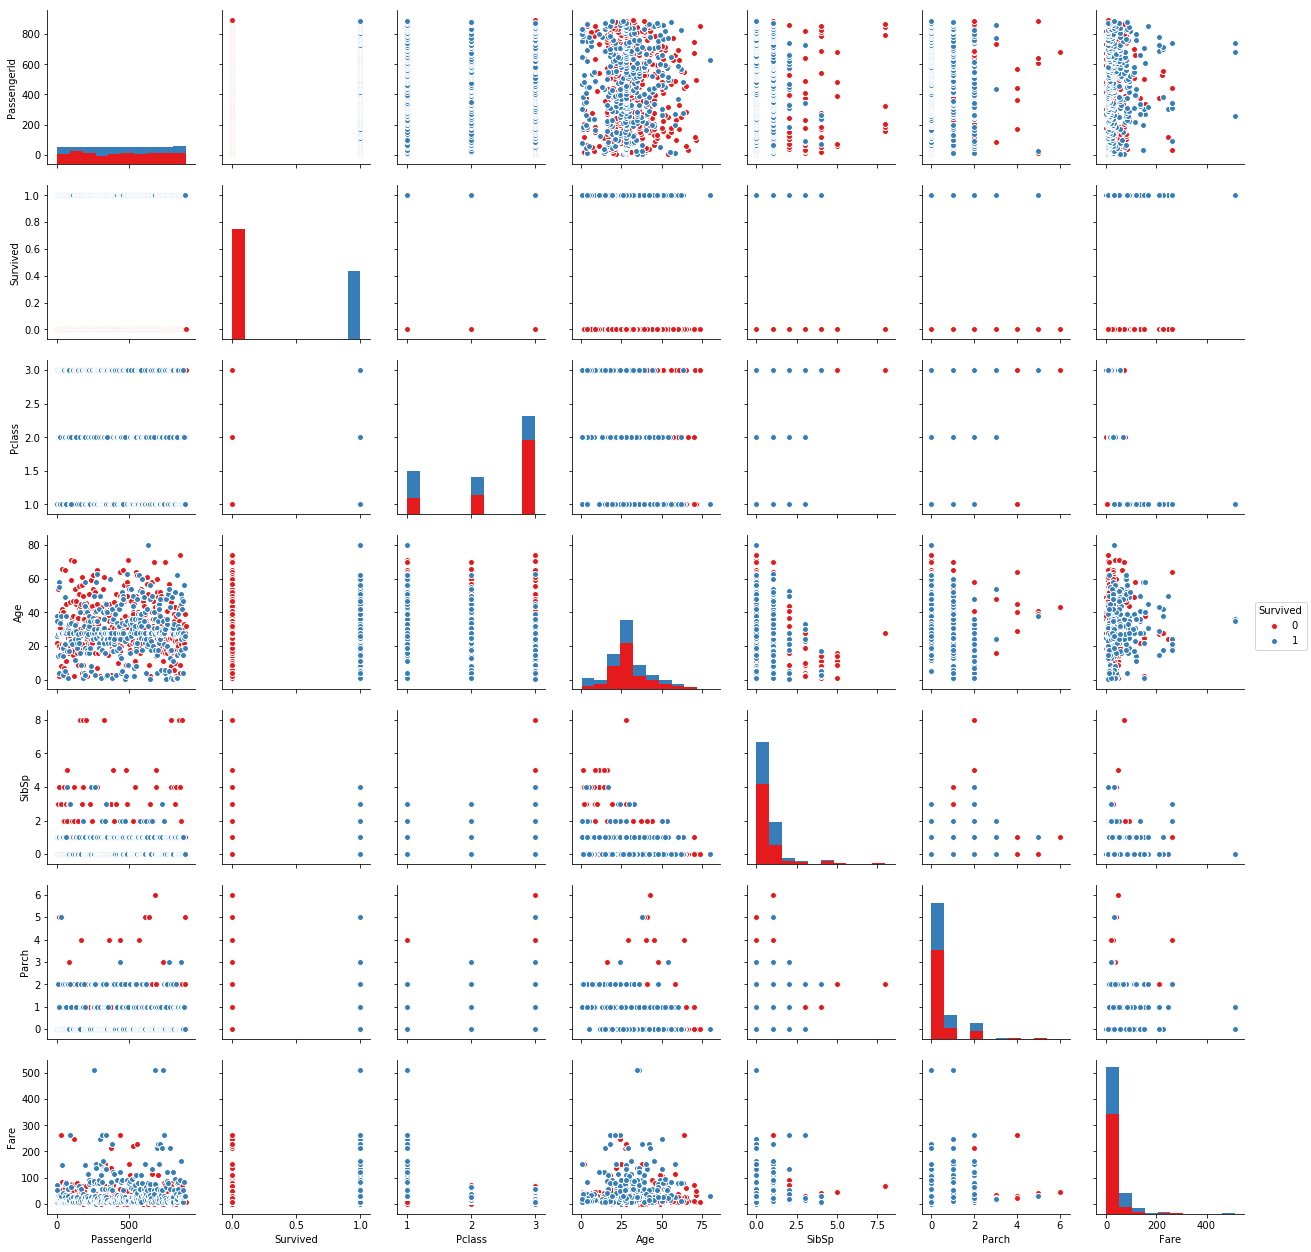

In [81]:
plt.figure(figsize=(25,8))
sns.pairplot(data=dataset,hue='Survived',palette='Set1')

## Feature Engineering

In the above part we played with the available features, getting some insights and some correlations. 
The Data Visualisation is very important since it makes us familiar with the data and give us some patterns. 
After this now we are at Feauture Engineering. Here we are going to clean the features and create new features, using th domain knowledge and insights we have from EDA.

We will go through different features and process them

In [82]:
# Let us create a status function for features
def status(feature):
    print("Processing ", feature, " ok")

** Let us load the data**

First we will create a combined dataset using test and train dataset.
We will create new features using train dataset and the copy those features to test dataset to prevent the leakage of information

**Note:** There should never be information leakage into test set, otherwise we can't determine if we have a good generalising model or a model which just learned from our dataset

In [83]:
# Let us make a function to combine the dataset
def combined_data():
    train = pd.read_csv('train.csv') # Training data
    test = pd.read_csv('test.csv') # Test data
    # since training data set contain Survived column and currently we don't need that while combing, so let us drop it
    target = train.Survived
    train.drop(['Survived'],axis=1 ,inplace=True)
    # Let us concat the data
    combined = train.append(test)
    # reset the index
    combined.reset_index(inplace=True)
    # Dropping index and PassengerId
    combined.drop(['index', 'PassengerId'], axis=1,inplace=True)
    return combined
    

In [84]:
combined = combined_data()

Time to see the new dataset

In [85]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
combined.shape

(1309, 10)

### 1.The Name Feature 

If you look at name feature then, you will say it won't contribute to the model. But if you look closely then the title of the name presents a categorical data where we can categorise the humans into different categories

In [88]:
# Let us do it. I will show how to get the title in as much as explained code

In [106]:
# first let us select a name 
name = combined['Name'][0]

In [107]:
print(name)

Braund, Mr. Owen Harris


In [108]:
# Look closely then the ',' separate the names in two 
name = name.split(',')
print(name)

['Braund', ' Mr. Owen Harris']


In [109]:
# Cool Now we need to select the second part and here the '.' splits the name into two
name = name[1].split('.')
print(name)

[' Mr', ' Owen Harris']


In [110]:
# now we have the name into two parts where the first one is required
name = name[0]
print(name)

 Mr


In [111]:
# Perfect Now apply it ito 1 function and for the dataset we made from training 
titles = set()
for name in dataset['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [112]:
print(titles)

{'Mrs', 'Don', 'Mlle', 'the Countess', 'Master', 'Capt', 'Ms', 'Rev', 'Mme', 'Dr', 'Col', 'Lady', 'Jonkheer', 'Major', 'Mr', 'Miss', 'Sir'}


In [116]:
# Let us create a dictionary for categorical values for names
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

# Function to get the titles 
def get_titles():
    # extract title from names
    combined['Title'] = combined['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    # converting them into categories
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined
    

In [117]:
combined = get_titles()

Processing  Title  ok


In [118]:
# Let us see the data
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [119]:
# Did we create the titles successfully?
# You can never be sure in Data science 
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [120]:
# Well yes indded there was this girl who is without title. Told you!

### 2. Age

We saw that we have 177 NAN in ages and earlier we filled them just median value. But it is not good, since we cannot estimate the age the using just media. Rather a better approach is to see at what factors do the age is relative and then filling the age with the estimated value by calculating those parameters

In [122]:
# First let us the missing values of age in train and test set
print(combined.iloc[:891]['Age'].isnull().sum())
print(combined.iloc[891:]['Age'].isnull().sum())

177
86


So we have the total Null values

In [127]:
group_train = combined[:891].groupby(['Sex','Title','Pclass'])
group_median_train = group_train.median()
group_median_train = group_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [128]:
group_median_train

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,2,Miss,24.0
2,female,3,Miss,18.0
3,female,1,Mrs,40.0
4,female,2,Mrs,31.5
5,female,3,Mrs,31.0
6,female,1,Officer,49.0
7,female,1,Royalty,40.5
8,male,1,Master,4.0
9,male,2,Master,1.0


Now if we have a male who is going from 2nd class and is an officer then the median age is 46.5.
Thus we see that we cannot just take the median age, we need to take the media age as per the different parameters

In [129]:
def fill_age(data):
    condition = (
    (group_median_train['Sex']==data['Sex'])&
    (group_median_train['Pclass']==data['Pclass']) & 
    (group_median_train['Title']==data['Title'])
    )
    return group_median_train[condition]['Age'].values[0]

def process_age():
    global combined
    
    combined['Age'] = combined.apply(lambda data: fill_age(data) if np.isnan(data['Age']) else data['Age'], axis=1)
    status('Age')
    return combined
    

In [130]:
combined = process_age()

Processing  Age  ok


In [132]:
combined.Age.isnull().sum()

0

### 3. Title

The title feature is our created feature, and it requires processing to give the dummy variables for categorical data

In [143]:
def process_names():
    global combined
    # we clean the Name variable
    #combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

In [144]:
combined= process_names()

Processing  names  ok


In [145]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


### 4. Fare

We will just impute the mean fare to the fare

In [152]:
def process_fare():
    global combined
    
    combined['Fare'].fillna(combined.iloc[:891]['Fare'].mean(), inplace=True)
    status('Fare')
    return combined

In [153]:
combined = process_fare()

Processing  Fare  ok


In [156]:
combined['Fare'].isnull().sum()

0

### 5. Processing Embarked

In [161]:
def process_embarked():
    global combined
    # Let us fill the embarked value with mode
    combined.Embarked.fillna('S',inplace=True)
    # time to create dummy variables
    dummy_embarked = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined.drop('Embarked', axis=1, inplace=True)
    # concatinationg the dummy variables
    combined = pd.concat([combined,dummy_embarked],axis=1)
    status('Embarked')
    return combined

In [162]:
combined = process_embarked()

Processing  Embarked  ok


In [163]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### 6. Cabin

Let us first get the first letter of cabin because we want the cabin tyoe and not the exact location of cabin. Let us first see how many canin types we have

In [165]:
train_cabin,test_cabin=set(),set()
for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
                       

In [167]:
print(train_cabin)
print(test_cabin)

{'C', 'G', 'A', 'T', 'E', 'D', 'U', 'F', 'B'}
set()


In [171]:
def process_cabin():
    global combined
    # let us fill na with u
    combined.Cabin.fillna('U',inplace=True)
    # filling the oter values with first word
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    #getting dummy variables
    cabin_dummy = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    combined = pd.concat([combined,cabin_dummy],axis=1)
    combined.drop('Cabin',axis=1,inplace =True)
    return combined

In [172]:
combined = process_cabin()

In [173]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


### 7. Sex

In [174]:
def process_sex():
    global combined
    # Let us map string to 0 and 1
    combined['Sex']= combined['Sex'].map({'male':1,'female':0})
    status('Sex')
    return combined

In [175]:
combined = process_sex()

Processing  Sex  ok


### 8. Pclass

In [176]:
def process_pclass():
    global combined
    #getting dummy class
    pclass_dummy = pd.get_dummies(combined['Pclass'], prefix= 'Pclass')
    combined = pd.concat([combined,pclass_dummy],axis=1)
    combined.drop('Pclass',axis=1,inplace=True)
    status('Pclass')
    return combined

In [177]:
combined = process_pclass()

Processing  Pclass  ok


In [178]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### 9. Tickets 

In [180]:
def clean_ticket(ticket):
    ticket = ticket.replace('/', '')
    ticket = ticket.replace('.', '')
    ticket = ticket.split()
    ticket = map(lambda t: t.strip(),ticket)
    ticket = list(filter(lambda t: not t.isdigit(),ticket))
    if len(ticket)>0:
        return ticket[0]
    else:
        return 'XXX'

In [181]:
tickets =set()
for t in combined['Ticket']:
    tickets.add(clean_ticket(t))

In [184]:
print(len(tickets))

37


In [187]:
def process_ticket():
    global combined
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def clean_ticket(ticket):
        ticket = ticket.replace('/', '')
        ticket = ticket.replace('.', '')
        ticket = ticket.split()
        ticket = map(lambda t: t.strip(),ticket)
        ticket = list(filter(lambda t: not t.isdigit(),ticket))
        if len(ticket)>0:
            return ticket[0]
        else:
            return 'XXX'
    #let us extract ticket and get the dummy variabels
    combined['Ticket'] = combined['Ticket'].map(clean_ticket)
    ticket_dummy = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined,ticket_dummy], axis=1)
    combined.drop('Ticket', axis=1,inplace=True)
    status('Ticket')
    return combined

In [188]:
combined = process_ticket()

Processing  Ticket  ok


In [189]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### 10. Family
If you look carefully then we don't have any feature named family, but if you see we have 2 features 'Parch' 'Sib Sp' that defines the family size. 
Family Size = Parch+SibSp+1 
And then we are going to divide it into another 3 variables
a) Singleton
b) Small Family
c) Large Family

In [193]:
def process_family():
    global combined
    # creating a new variabel FamilySize
    combined['FamilySize'] = combined['Parch']+combined['SibSp']+1
    # creating new variables
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s==1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['BigFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)
    status('Family')
    return combined

In [194]:
combined = process_family()

Processing  Family  ok


In [196]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,BigFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


** We started with 12 features and after feature engineering we ended up with 67 features**

## Classifier Modelling

We did visualisation, we did feature engineering, now we have cleaned and feature rich dataset we have done 70-80% of our task. Now we are going to make different models, play with their hyper parameters and check the resulting score from different models. And then selecting the model with max score

There are many classifiers like logistic regression, SVM, decision tress, random forests etc
Initially we will use RandomForest model

Back to our problem, we now have to:

Break the combined dataset in train set and test set.
Use the train set to build a predictive model.
Evaluate the model using the train set.
Test the model using the test set and generate and output file for the submission.
Keep in mind that we'll have to reiterate on 2. and 3. until an acceptable evaluation score is achieved.

**Let us import the libraries**

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

To evaluate our model we'll be using a 5-fold cross validation with the accuracy since it's the metric that the competition uses in the leaderboard.

To do that, we'll define a small scoring function.

In [199]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [200]:
# Let us recover the train,test and target values
def recover_train_test_target():
    target = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined[:891]
    test = combined[891:]
    return train,test,target

In [201]:
train,test,target = recover_train_test_target()

**Feature Selection**
IF we look, then we have 67 features. The question is do every feature has same impact? 
We always need the minimum features with maximum affect on target variable

After feature engineering we need feature selection as,

1. It decreases redundancy among the data
2. It speeds up the training process
3. It reduces overfitting

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [202]:
classifier = RandomForestClassifier(n_estimators=50,max_features='sqrt')
classifier.fit(train,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

##### Let us plot the importance of features

In [204]:
features = pd.DataFrame()
features['features'] = train.columns
features['importance'] = classifier.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('features', inplace=True)

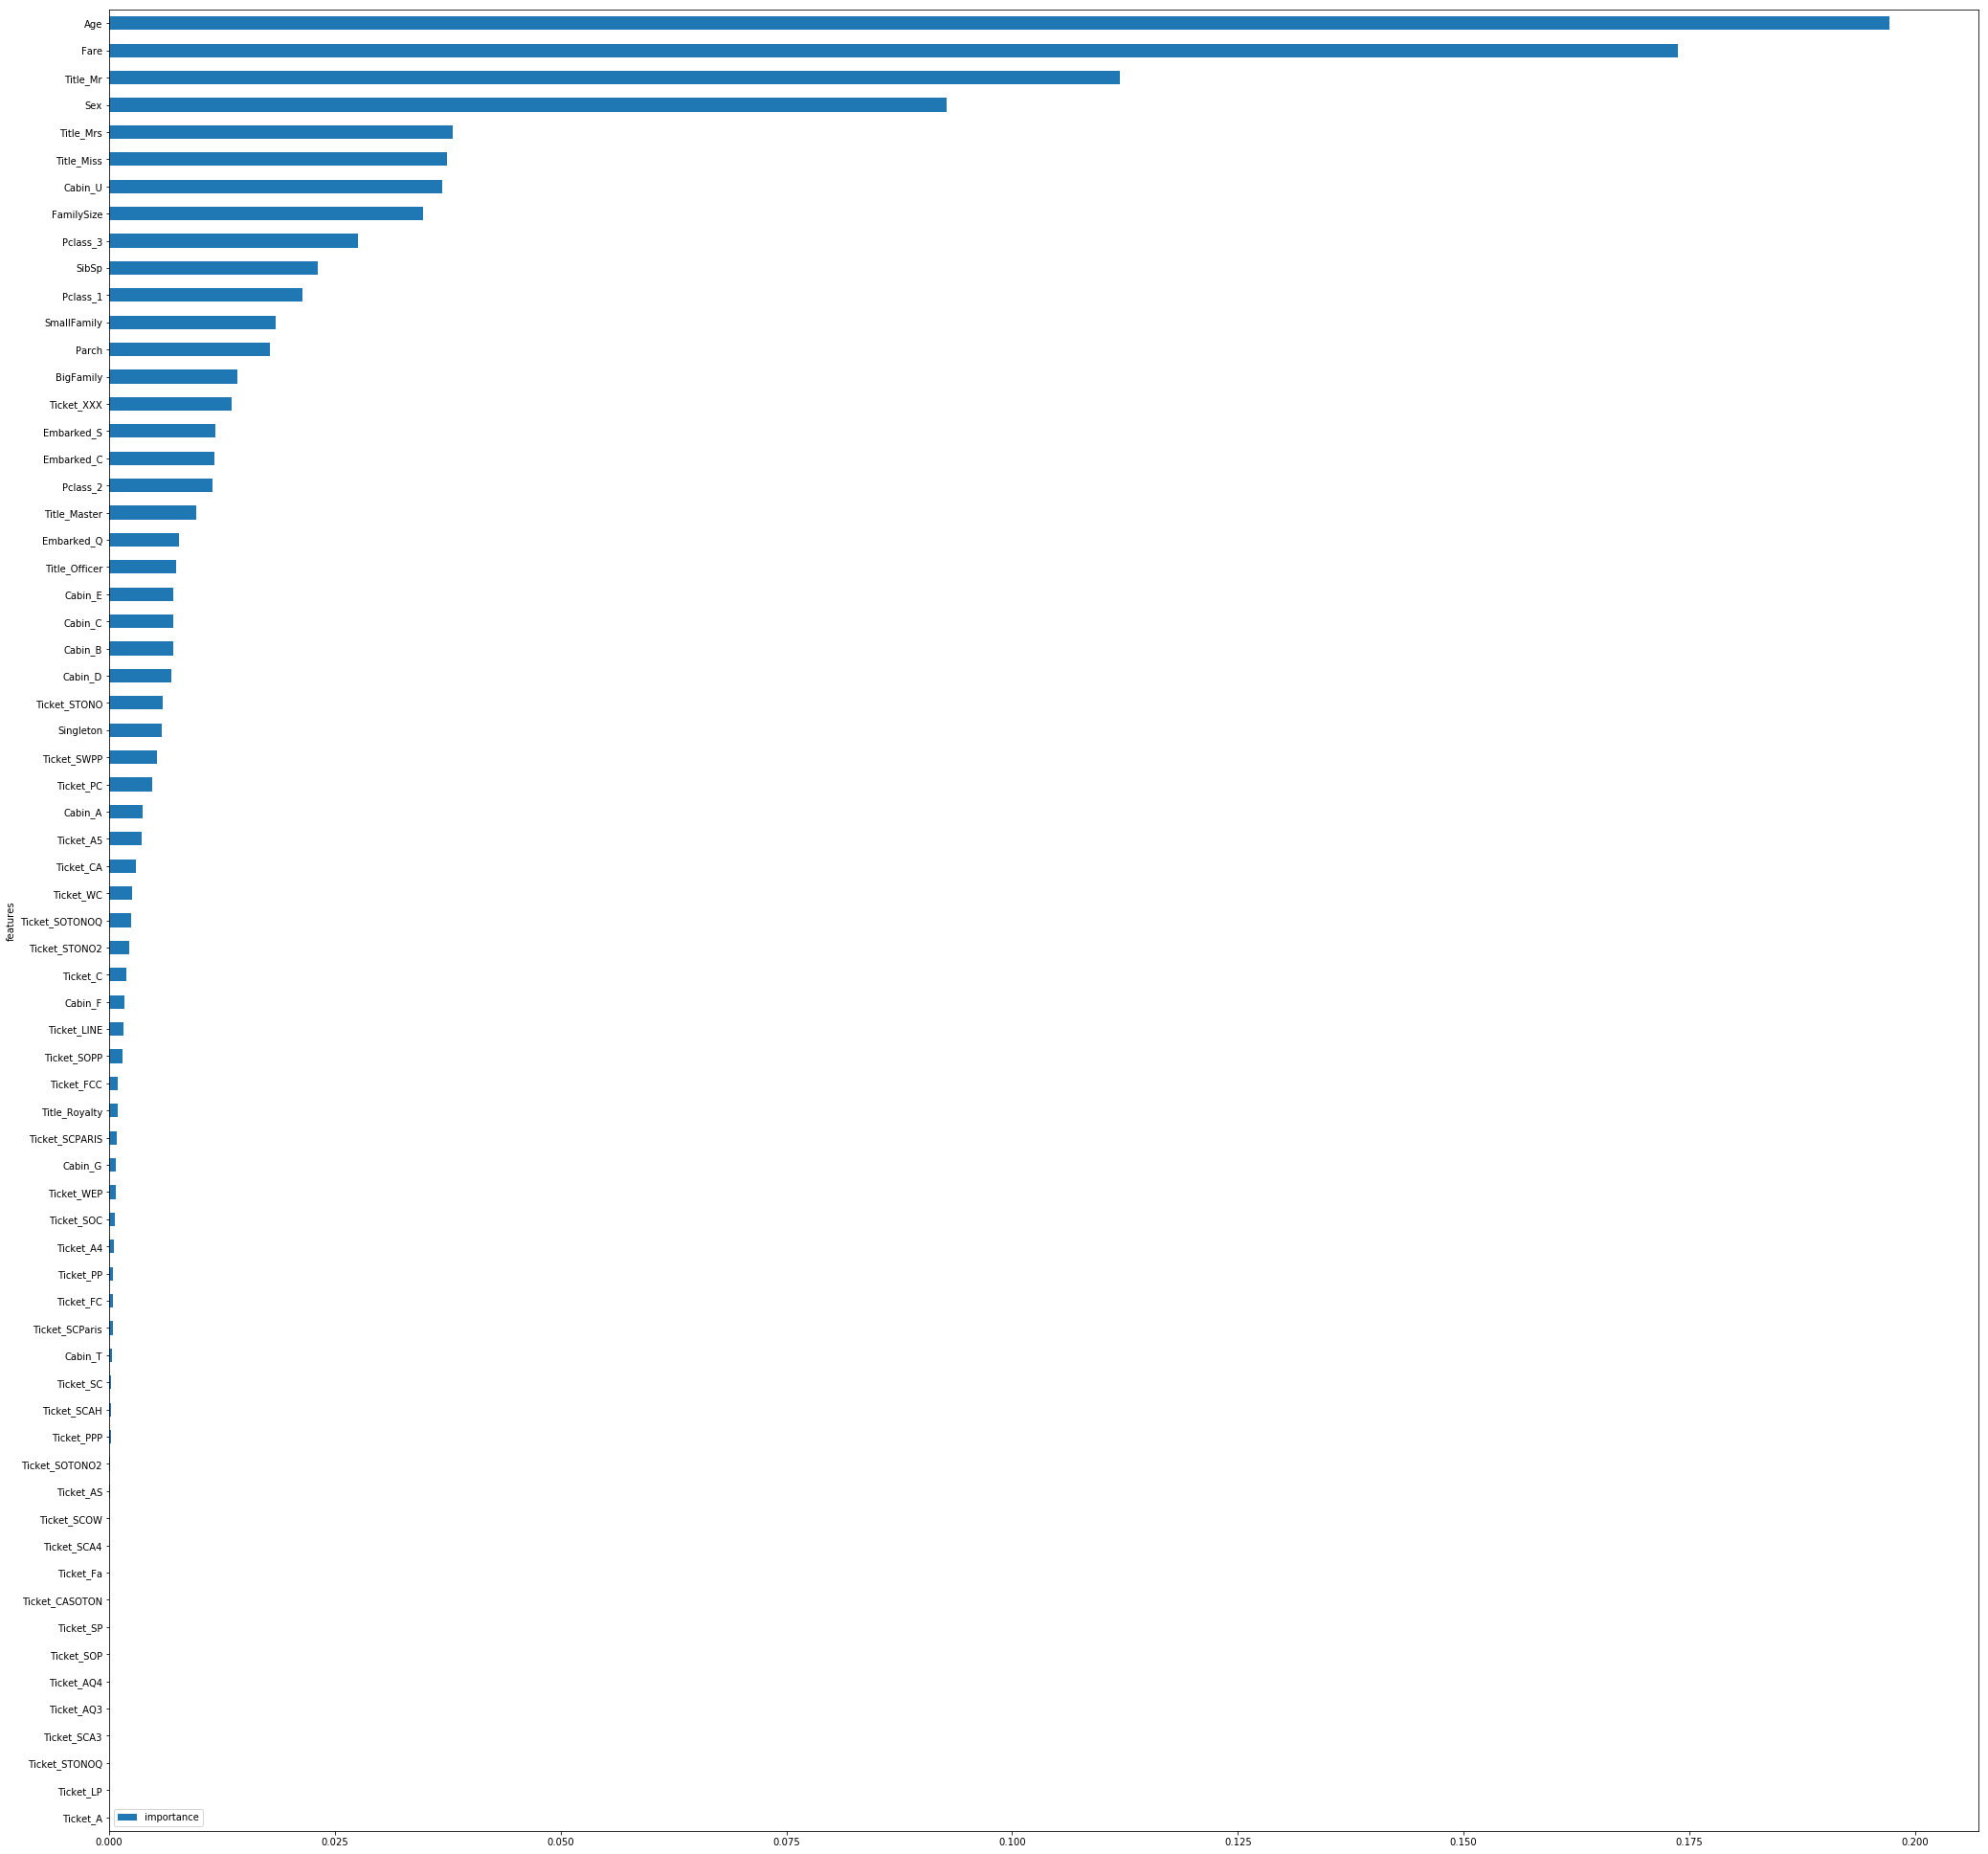

In [209]:
features.plot(kind='barh', figsize=(35,35))

With a closer look we can see that we have greater importance with Age, Fare, Title,Sex

In [210]:
# Let us reduce these features with the help of Random Forest we just created
model = SelectFromModel(classifier, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 13)

In [211]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 13)


So now we have reduced and compact version of features. 
Let us explore some more models

** More base models**

In [217]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [218]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=target, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print ('-----')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8125832554019151
-----
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8226832026674356
-----
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8126272658183046
-----
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8249176976842577
-----


** Ok we will be using Random Forests First and using its different variations with hypter parameter**

In [219]:
parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(forest,scoring='accuracy',param_grid=parameter_grid,cv=cross_validation,verbose=1)

In [220]:
grid_search.fit(train,target)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  2.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 6, 8], 'n_estimators': [50, 10], 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [221]:
model = grid_search

In [224]:
params = grid_search.best_params_
scores = grid_search.best_score_

In [225]:
print('Best Parameters {}'.format(params))
print('Best Scores {}'.format(scores))

Best Parameters {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 10}
Best Scores 0.8395061728395061


** We have best score of 0.8395. Let us build the output file to submit on kaggle**

In [226]:
output = model.predict(test).astype(int)
def_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
def_output['PassengerId'] = aux['PassengerId']
def_output['Survived'] = output
def_output[['PassengerId', 'Survived']].to_csv('result.csv', index=False)